c:\ProgramData\Anaconda3\envs\astrophysics\lib\site-packages\astroquery\sdss\core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


       ra               dec         ...      specobjid       run2d 
---------------- ------------------ ... ------------------- -------
165.888114296596 -0.787257826795205 ... 4248180690250604544 v5_10_0
165.870074220494 -0.958742073160432 ... 4248182614395953152 v5_10_0
165.896657151589  -1.02245976924706 ... 4248182339518046208 v5_10_0
165.924305594328 -0.939347085147873 ... 4248182064640139264 v5_10_0
166.077893671431 -0.956786300626142 ... 4248193059756417024 v5_10_0
166.286938589692 -0.946322017132361 ... 4248192784878510080 v5_10_0
165.848221668095 -0.963827494004857 ... 4248172993669210112 v5_10_0
165.890521329145 -0.942939289010728 ... 4248181789762232320 v5_10_0
 165.98417037073 -0.849372586757156 ... 4248181240006418432 v5_10_0
 166.12374406507  -1.00144548277888 ... 4248193609512230912 v5_10_0
             ...                ... ...                 ...     ...
166.016395376398 -0.681529718317441 ... 4320212451335315456 v5_10_0
166.198960643771  -0.68162837563356 ... 43202055

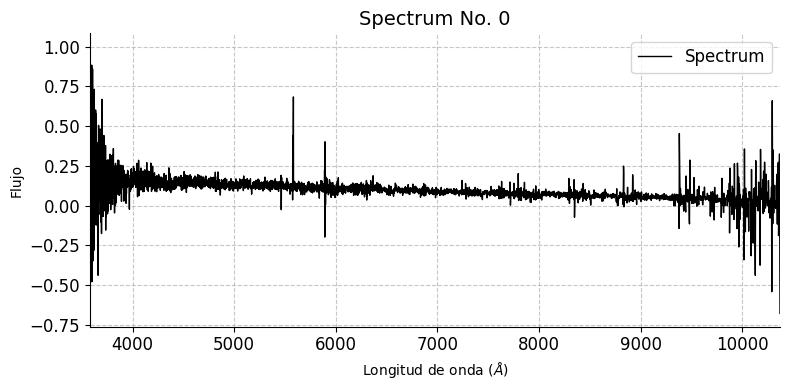

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
import h5py


def normalize_spectrum(flux):
    # Normalize the flux by dividing by the maximum value
    max_flux = max(flux)
    normalized_flux = flux / max_flux
    return normalized_flux

def plot_spectra(wavelength, flux, spectrum_info=''):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Customize plot appearance
    ax.set_title("Spectrum " + spectrum_info, fontsize=14)
    ax.tick_params(labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(["Spectrum"], loc='upper right', fontsize=12)

    plt.tight_layout()
    plt.show()

def descargaxId(ra, dec, radius=10):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    print(xid)
    return xid

def descargar_y_visualizar_espectro(ra, dec, radius=10, n_spec=0, save_to_file=None):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    xid=xid[xid["objid"]==1237674649385763233]
    print(xid)
    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)

        # Check if there are enough spectra available
        if len(j_spectra) > n_spec:
            spectrum = j_spectra[n_spec]
            flux = spectrum[1].data['flux']
            flux = normalize_spectrum(flux)
            wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda

            # Visualizar el espectro
            plot_spectra(wavelength, flux, spectrum_info=f"No. {n_spec}")

            # Guardar los datos del espectro en un archivo HDF5 si se especificó
            if save_to_file:
                with h5py.File(save_to_file, 'w') as hf:
                    hf.create_dataset('wavelength', data=wavelength)
                    hf.create_dataset('flux', data=flux)

            return xid, j_spectra
        else:
            print(f"No hay suficientes espectros disponibles para el número especificado: {n_spec}")
            return None, None
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")
        return None, None

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 166.08171
    dec = -0.88486

    # Llamada a la función para descargar y visualizar el espectro

nspec=0
radius=100
xid = descargaxId(ra, dec, radius=1000)
xidDescargado, j_spectra = descargar_y_visualizar_espectro(ra, dec, radius=1000, n_spec=nspec, save_to_file='spectrum_'+str(xid[nspec]["objid"])+'_RA'+str(ra)+'_DEC'+str(dec)+'_'+str(nspec)+'.hdf5')


In [130]:
xid=xid[xid["z"]<0.2]
xid

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d
float64,float64,int64,int32,int32,int32,int32,float64,int32,int32,int32,int64,bytes7
165.924305594328,-0.939347085147873,1237648720150856023,756,301,1,335,-0.0003994612,3773,55240,588,4248182064640139264,v5_10_0
166.077893671431,-0.956786300626142,1237648720150921235,756,301,1,336,0.0007554922,3773,55240,628,4248193059756417024,v5_10_0
166.12374406507,-1.00144548277888,1237648720150921620,756,301,1,336,9.407886e-05,3773,55240,630,4248193609512230912,v5_10_0
166.147092571955,-0.739872197898825,1237674649385763233,6793,301,2,37,3.352628e-05,3773,55240,622,4248191410488975360,v5_10_0
166.099138670513,-0.773141220557211,1237674649385763208,6793,301,2,37,0.0001925367,3773,55240,624,4248191960244789248,v5_10_0
166.035811174598,-1.10560820688549,1237674648848827054,6793,301,1,36,0.001261506,3773,55240,596,4248184263663394816,v5_10_0
165.84158549672,-1.11514842614699,1237674648848761433,6793,301,1,35,9.468565e-05,3773,55240,591,4248182889273860096,v5_10_0
165.910118484476,-0.647844298903619,1237648703495667946,752,301,2,149,0.08297382,277,51908,109,311904267898218496,26
165.81362846259,-0.656400807544382,1237648703495667864,752,301,2,149,-2.617539e-05,277,51908,144,311913888624961536,26


In [109]:
xid[nspec]["objid"]

1237648720150790893

In [86]:
j_spectra[0][0]

In [89]:
from astropy.io import fits
j_spectra[0][0]

In [92]:
# Obtener el primer HDU de la primera sublista
header = j_spectra[0][0].header
header
# Obtener la clasificación del espectro 
from astropy.io import fits

# Supongamos que 'hdu' es un objeto del tipo <astropy.io.fits.hdu.image.PrimaryHDU>
# Para ver sus atributos y métodos, utiliza la función dir()
hdu = header = j_spectra[0][0]
print(dir(hdu))


['_EXCLUDE', '_MASK', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_axes', '_bitpix', '_blank', '_bscale', '_buffer', '_bzero', '_calculate_checksum', '_calculate_datasum', '_char_encode', '_checksum', '_checksum_valid', '_close', '_compute_checksum', '_compute_hdu_checksum', '_convert_pseudo_integer', '_data_loaded', '_data_needs_rescale', '_data_offset', '_data_replaced', '_data_size', '_datasum', '_datasum_valid', '_default_name', '_do_not_scale_image_data', '_dtype_for_bitpix', '_encode_byte', '_file', '_from_data', '_gcount', '_get_raw_data', '_get_scaled_image_data', '_get_timestamp', '_has_data', '_hdu_registry', '_header', '_header_offset', '_header_str', '_modified', '_new', '_orig_

In [94]:
# Supongamos que 'hdu' es un objeto del tipo <astropy.io.fits.hdu.image.PrimaryHDU>
# Acceder al encabezado y mostrar su contenido
header = hdu.header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
FLAVOR  = 'science '           / exposure type, SDSS spectro style              
BOSSVER = 'v2_2_2  '           / ICC version                                    
MJD     =                55302 / APO fMJD day at start of exposure              
MJDLIST = '55300 55302'        /                                                
RA      =           165.158516 / RA of telescope boresight (deg)                
DEC     =             0.001936 / Dec of telescope boresight (deg)               
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '        

In [76]:
# Obtener el espectro específico
from astropy.io import fits
fits.info(j_spectra)


OSError: File-like object does not have a 'write' method, required for mode 'ostream'.

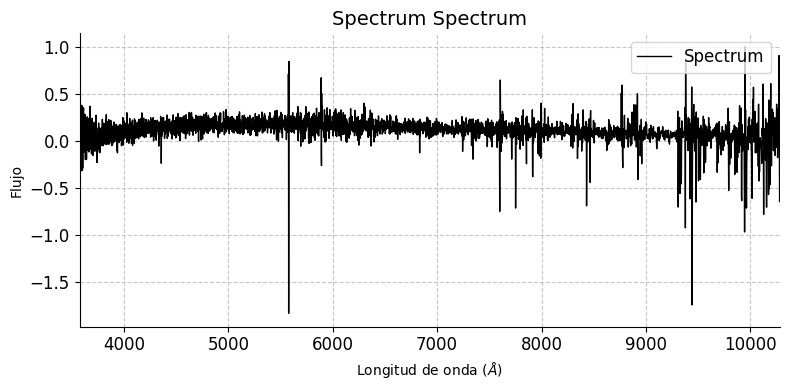

In [63]:
import h5py
import matplotlib.pyplot as plt

def plot_spectra_from_hdf5(file_path):
    with h5py.File(file_path, 'r') as hf:
        # Read the wavelength and flux data from the HDF5 file
        wavelength = hf['wavelength'][:]
        flux = hf['flux'][:]

    # Plot the spectrum
    plot_spectra(wavelength, flux, spectrum_info='Spectrum')

# File path of the HDF5 file
file_path = 'spectrum_0.hdf5'

# Call the function to plot the spectrum from the HDF5 file
plot_spectra_from_hdf5(file_path)

# Show the plot
plt.show()


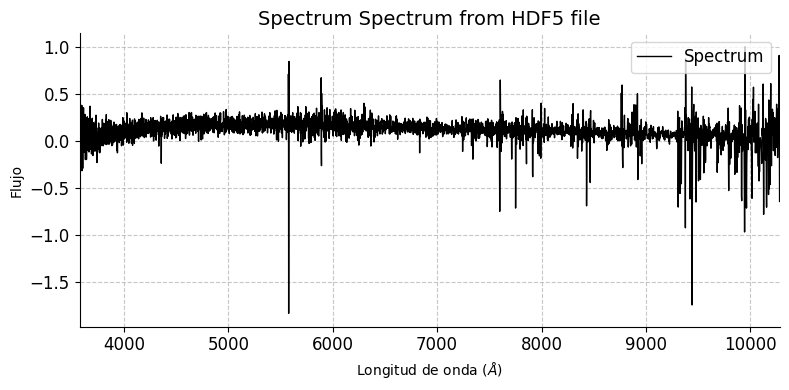

In [64]:
import h5py

def normalize_spectrum(flux):
    # Normalize the flux by dividing by the maximum value
    max_flux = max(flux)
    normalized_flux = flux / max_flux
    return normalized_flux

def plot_spectra_from_hdf5(file_path):
    with h5py.File(file_path, 'r') as hf:
        # Read the wavelength and flux data from the HDF5 file
        wavelength = hf['wavelength'][:]
        flux = hf['flux'][:]

        # Normalize the flux
        normalized_flux = normalize_spectrum(flux)

    # Plot the spectrum
    plot_spectra(wavelength, normalized_flux, spectrum_info='Spectrum from HDF5 file')

# File path of the HDF5 file
file_path = 'spectrum_0.hdf5'

# Call the function to plot the normalized spectrum from the HDF5 file
plot_spectra_from_hdf5(file_path)

# Show the plot
plt.show()


In [66]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Coordenadas en formato "11:00:19.61 -00:53:05.5"
coord_str = "11:00:19.61 -00:53:05.5"

# Convertir a SkyCoord
coord = SkyCoord(coord_str, unit=(u.hourangle, u.deg))

# Obtener las coordenadas en grados
ra_deg = coord.ra.deg
dec_deg = coord.dec.deg

print(f"RA: {ra_deg:.5f} deg, Dec: {dec_deg:.5f} deg")


RA: 165.08171 deg, Dec: -0.88486 deg
